<hr><font color="green"><h1>from file:  7-2 Scatterplot_Practice</h1></font>

In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In this workspace, you'll make use of this data set describing various car attributes, such as fuel efficiency. The cars in this dataset represent about 3900 sedans tested by the EPA from 2013 to 2018. This dataset is a trimmed-down version of the data found [here](https://catalog.data.gov/dataset/fuel-economy-data).

In [3]:
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### **TO DO 1**: 
Let's look at the relationship between fuel mileage ratings for city vs. highway driving, as stored in the 'city' and 'highway' variables (in miles per gallon, or mpg). **Use a _scatter plot_ to depict the data.**
1. What is the general relationship between these variables? <span style="color:blue">Positive correlation </span> 
2. Are there any points that appear unusual against these trends? <span style="color:blue">Nope</span> 

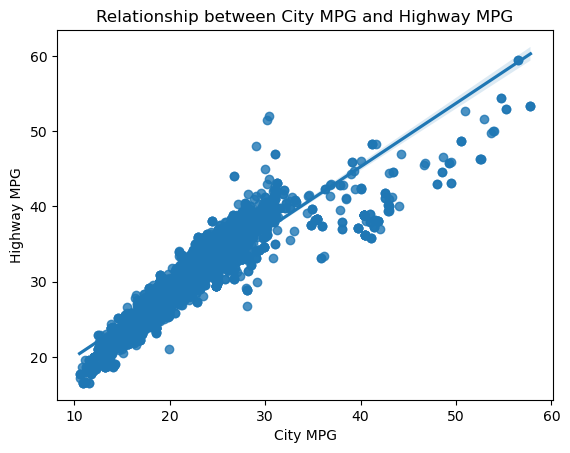

In [6]:
city = fuel_econ['city']
highway = fuel_econ['highway']

# Create a scatter plot with regression line
sb.regplot(x=city, y=highway)
plt.xlabel('City MPG')
plt.ylabel('Highway MPG')
plt.title('Relationship between City MPG and Highway MPG')
plt.show()

### **TO DO 2**: 
Let's look at the relationship between two other numeric variables. How does the engine size relate to a car's CO2 footprint? The 'displ' variable has the former (in liters), while the 'co2' variable has the latter (in grams per mile). **Use a heat map to depict the data.** How strong is this trend? <span style="color:blue"><em>Strong</em></span> 

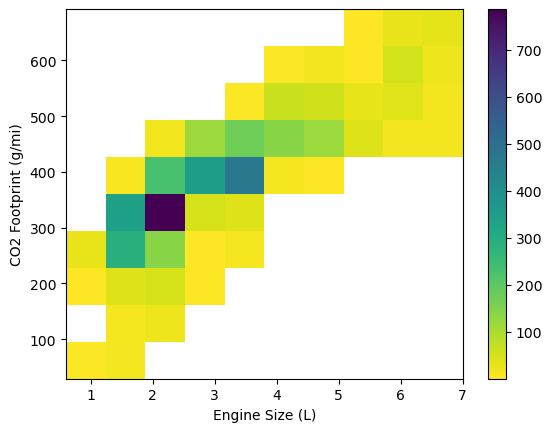

In [8]:


# Create a heatmap
plt.hist2d(data = fuel_econ, x = 'displ', y = 'co2', cmin=0.5, cmap='viridis_r')
plt.colorbar()


plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Footprint (g/mi)')

# Display the heatmap
plt.show()


<hr><font color="green"><h1>from file:  9-2 Violin_and_Box_Plot_Practice</h1></font>

In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


We'll continue to make use of the fuel economy dataset in this workspace.

In [2]:
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### Preparatory Step
The cars in this dataset are categorized into one of five different vehicle classes based on size. Starting from the smallest, they are: `{Minicompact Cars, Subcompact Cars, Compact Cars, Midsize Cars, and Large Cars}`. 



### **TO DO**: 
1. What is the relationship between the size of a car and the size of its engine? The vehicle classes can be found in the `VClass` column, while the engine sizes are in the `displ` column (in liters). 

**Hint**: Make sure that the order of vehicle classes makes sense in your plot!

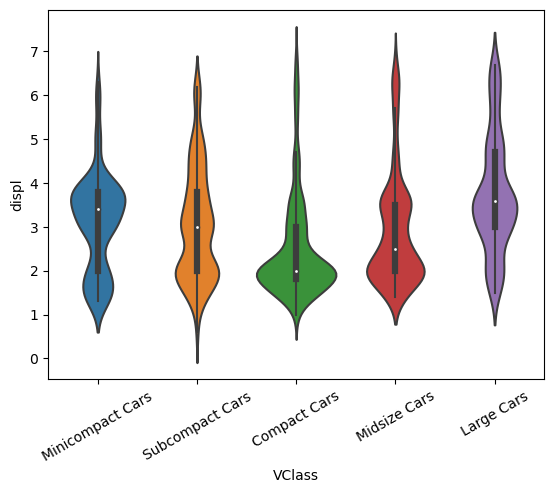

In [7]:
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

# Create a violin plot using seaborn
sb.violinplot(data=fuel_econ, x='VClass', y='displ')
plt.xticks(rotation=30);


<hr><font color="green"><h1>from file:  13-2 Categorical_Plot_Practice</h1></font>

In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

We'll continue to make use of the fuel economy dataset in this workspace.

In [2]:
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


###  **TO DO**
Use a plot to explore whether or not there are differences in recommended fuel type depending on the vehicle class. Only investigate the difference between the two main fuel types found in the 'fuelType' variable: Regular Gasoline and Premium Gasoline. (The other fuel types represented in the dataset are of much lower frequency compared to the main two, that they'll be more distracting than informative.) 

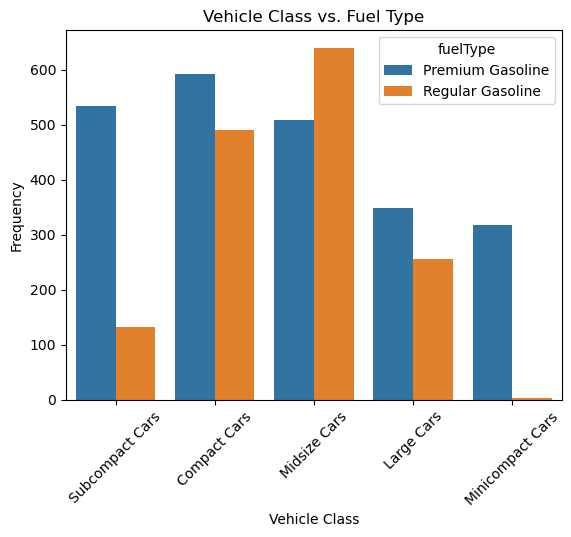

In [4]:
# Filter the DataFrame to include only Regular Gasoline and Premium Gasoline fuel types
filtered_data = fuel_econ[fuel_econ['fuelType'].isin(['Regular Gasoline', 'Premium Gasoline'])]

# Create a clustered bar chart
sb.countplot(data=filtered_data, x='VClass', hue='fuelType')

# Set the plot title and axis labels
plt.title('Vehicle Class vs. Fuel Type')
plt.xlabel('Vehicle Class')
plt.ylabel('Frequency')

# Rotate the x-tick labels
plt.xticks(rotation=45)


# Display the clustered bar chart
plt.show()

<hr><font color="green"><h1>from file:  19-2 Additional_Plot_Practice</h1></font>

In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


We'll continue to make use of the fuel economy dataset in this workspace.

In [2]:
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### **Task 1**: 
Plot the distribution of combined fuel mileage (column 'comb', in miles per gallon) by manufacturer (column 'make'), for all manufacturers with at least eighty cars in the dataset. Consider which manufacturer order will convey the most information when constructing your final plot. 

**Hint**: Completing this exercise will take multiple steps! Add additional code cells as needed in order to achieve the goal.

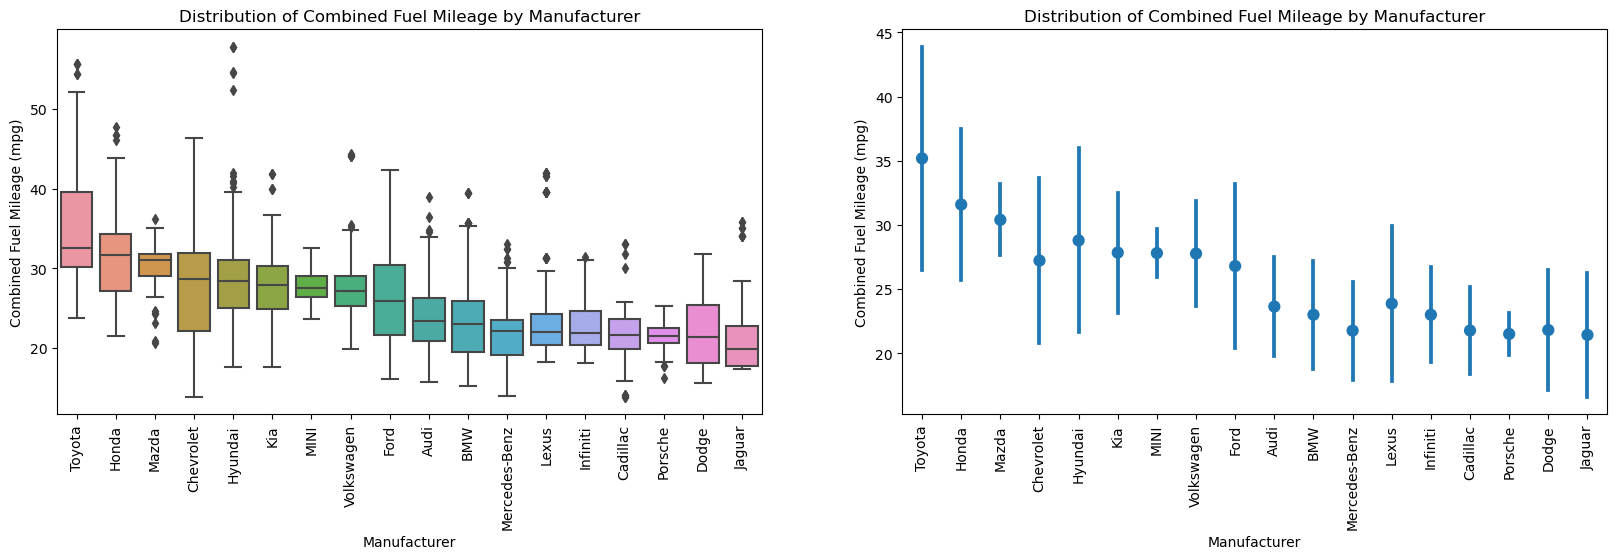

In [13]:
plt.figure(figsize = [20, 5])

# Filter the dataset to include only the manufacturers with at least eighty cars
manufacturer_counts = fuel_econ['make'].value_counts()
manufacturers = manufacturer_counts[manufacturer_counts >= 80].index
filtered_data = fuel_econ[fuel_econ['make'].isin(manufacturers)]

# Group the data by manufacturer and calculate the median combined fuel mileage
median_fuel_mileage = filtered_data.groupby('make')['comb'].median().sort_values(ascending=False)


# Using a boxplot
plt.subplot(1, 2, 1)
sb.boxplot(data=filtered_data, x='make', y='comb', order=median_fuel_mileage.index)

# Set the plot title and axis labels
plt.title('Distribution of Combined Fuel Mileage by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Combined Fuel Mileage (mpg)')

# Rotate x-tick labels for better readability
plt.xticks(rotation=90)



# Using a pointplot
plt.subplot(1, 2, 2)
sb.pointplot(data=filtered_data, x='make', y='comb', ci='sd', linestyles="" , order=median_fuel_mileage.index)

# Set the plot title and axis labels
plt.xticks(rotation=15);
plt.title('Distribution of Combined Fuel Mileage by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Combined Fuel Mileage (mpg)')

# Rotate x-tick labels for better readability
plt.xticks(rotation=90)

plt.show()



### **Task 2**: 
Continuing on from the previous task, plot the mean fuel efficiency for each manufacturer with at least 80 cars in the dataset.  Can you use error bars?

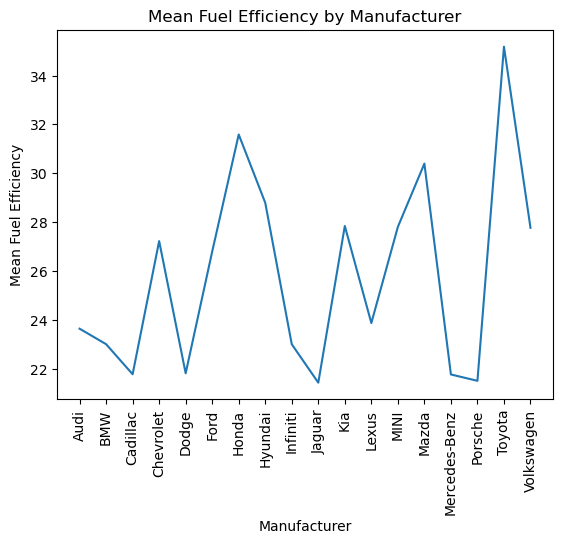

In [21]:


# Filter the DataFrame to include manufacturers with at least 80 cars
filtered_data = fuel_econ['make'].value_counts().loc[lambda x: x >= 80]

# Filter the DataFrame based on the selected manufacturers
filtered_data = fuel_econ[fuel_econ['make'].isin(filtered_data.index)]

# Calculate the mean fuel efficiency for each manufacturer
mean_data = filtered_data.groupby('make')['comb'].mean().reset_index()

# Plot the mean fuel efficiency with error bars
plt.errorbar(data=mean_data, x='make', y='comb')

# Set the plot title and axis labels
plt.title('Mean Fuel Efficiency by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Mean Fuel Efficiency')

# Rotate the x-tick labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()